In [3]:
import pandas as pd
df=pd.read_csv('Retail_Sales_Data.csv')
df.head()

,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3


In [5]:
relevant_features=df[['State','Shop_Category','Sales']]
relevant_features.head()

,State,Shop_Category,Sales
0,MP,Grocery,10
1,UP,Dairy,30
2,AP,Deli,23
3,RP,Meat,21
4,DP,Clothes,90


In [17]:
gbr=df.groupby('State')['Sales'].sum().reset_index()
gbr

,State,Sales
0,AP,12176
1,DP,23346
2,KP,10887
3,MP,4916
4,RP,11049
5,UP,4072


<BarContainer object of 312 artists>

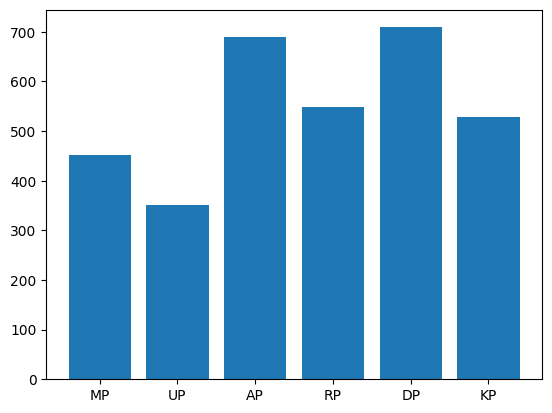

In [18]:
import matplotlib.pyplot as plt
plt.bar(gbr['State'],gbr['Sales'])

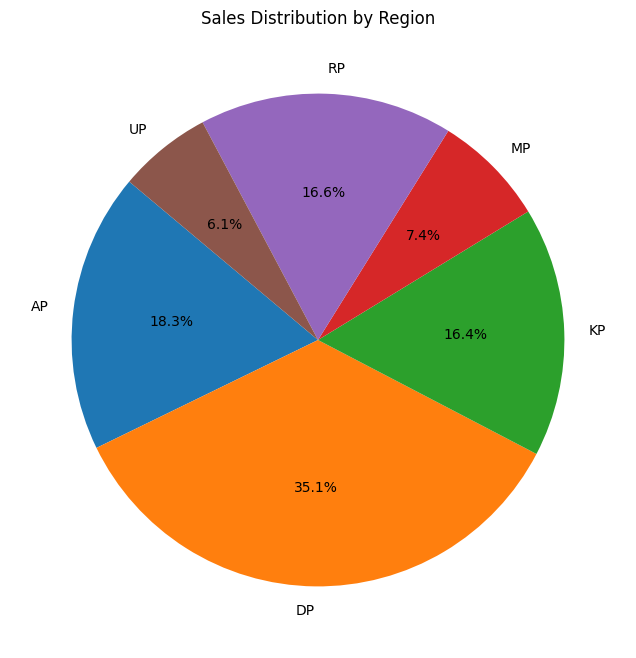

In [23]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gbr['Sales'], labels=gbr['State'], autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Sales Distribution by Region')
plt.show()


In [42]:
topp=gbr.sort_values(by='Sales',ascending=False)
top=topp.iloc[0]
print(top)


State       DP
Sales    23346
Name: 1, dtype: object


In [40]:
# Sort the region_sales DataFrame in descending order by 'Sales' column
top_regions = gbr.sort_values(by='Sales', ascending=False)

# Get the top-performing region
top_region = top_regions.iloc[0]

print("Top-Performing Region: ", top_region['State'])


Top-Performing Region:  DP


In [45]:
reg_pro=df.groupby(['State','Shop_Category']).sum()
print(reg_pro)

                     Transaction_ID  Customer_ID   Age  Sales   
State Shop_Category                                             
AP    Clothes                  1417        75878   565   2127  \
      Dairy                    1286        60684   533   1197   
      Deli                     1454        44774   420   1303   
      Electronics              2339       118990   973   3818   
      Grocery                   286        18812   112    823   
      Meat                     1548        81858   553   2908   
DP    Clothes                  5492       258611  1410   7133   
      Dairy                    3539       202182  1005   6027   
      Deli                     2085        80796   522   1723   
      Electronics              2067       119608   614   4645   
      Grocery                  1202        69618   290   1736   
      Meat                     1469        97227   591   2082   
KP    Clothes                  1963       126275   679   3581   
      Dairy              

In [49]:
pivot_df=reg_pro.pivot(index='State',columns='Shop_Category',values='Sales')

KeyError: 'State'